In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import plot_roc_curve
from imblearn.over_sampling import SMOTE

# Final Project DTSA 5509

GitHub Link: https://github.com/cb623/DTSA_5509-Final-Project



## Introduction:

Welcome to my final project for this course. The goal for the project is an analysis of the dataset utilized to predict whether if a patient had a stroke or not. The classification dataset is determined with building multiple models and then determine which one is the best performing one.

According to the CDC: "A stroke, sometimes called a brain attack, occurs when something blocks blood supply to part of the brain or when a blood vessel in the brain bursts. In either case, parts of the brain become damaged or die. A stroke can cause lasting brain damage, long-term disability, or even death."

The motivation for this project is to see what attributes are the most important in determining whether if someone had a stroke in the past. Certain factors can have contributing factors crucial to whether ther may be an imminent stroke. These are taken into consideration to try to prevent it from happening in the first place.


## Data:
The dataset was found at kaggle.com (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

The dataset contains 12 columns, and 5110 rows with the following features:
* 5 Categorical features (gender, ever_married, work_type, Residence_type and smoking_status)
* 3 Numerical features (age, avg_glucose_level and bmi)
* 3 Binary features (hypertension, heart_disease and stroke, 0 = have not, 1 = have)

In [48]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [49]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [50]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### According to CDC: 
* "A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes."
* "If your BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range."

## Data Cleaning:
The first step of the data cleaning is to remove the id column as this is not relevant to our analysis.

Second step is to check if the dataset has any null values. And as it turns out, it does. It has 201 values in the "bmi" column.

There are several ways of fill the na/null values. We can either fill them with mean, zero, or simply just drop them. But for this case, I decided to use K Nearest Neighbor imput function to generate the closest value and replace the na values. I used the age feature to estimate what bmi this person might have. 

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [52]:
df = df.iloc[:,1:]

In [53]:
# checking number of null counts
null_count = df.isnull().sum()
null_count

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

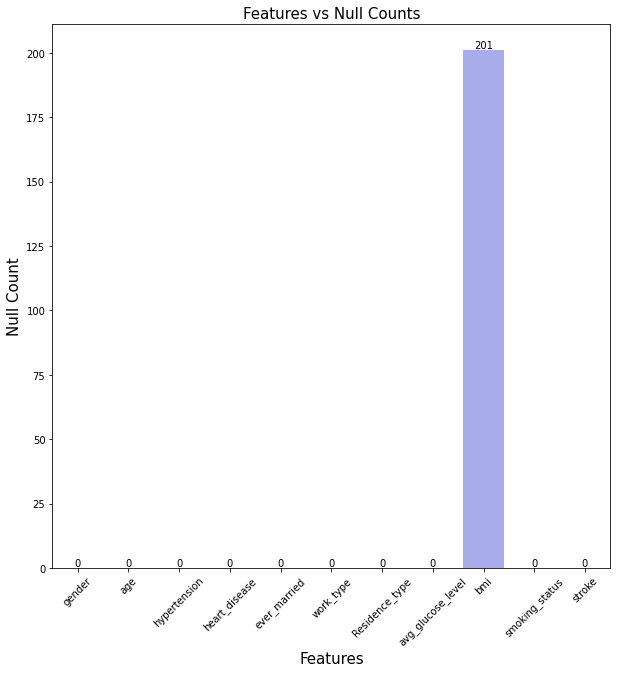

In [54]:
# plotting the features vs null counts
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=df.columns, y=null_count)
ax.bar_label(ax.containers[0])
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Null Count', fontsize = 15)
plt.title('Features vs Null Counts', fontsize = 15)
plt.xticks(fontsize = 10, horizontalalignment = 'center', rotation = 45)
plt.yticks(fontsize = 10)
plt.show()

In [55]:
# using the knn imputer function to transform null bmi values.
imputer = KNNImputer(n_neighbors=5)
df_filled = imputer.fit_transform(df[['age','bmi']])
BMI = df_filled[:,1:].tolist()

In [56]:
lst = []
for i in range(len(BMI)):
    lst.append(BMI[i][0])

In [57]:
df['bmi'] = lst

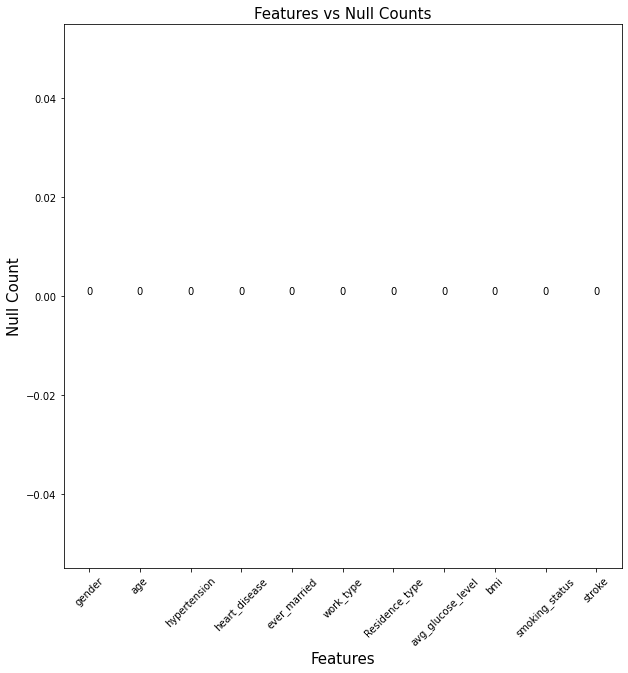

In [58]:
# plotting the features vs graph again to make sure there are 0 null values.
null_count2 = df.isnull().sum()
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=df.columns, y=null_count2)
ax.bar_label(ax.containers[0])
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Null Count', fontsize = 15)
plt.title('Features vs Null Counts', fontsize = 15)
plt.xticks(fontsize = 10, horizontalalignment = 'center', rotation = 45)
plt.yticks(fontsize = 10)
plt.show()

## Exploratory Data Analysis:
For the EDA, I have used bargraphs and histogram to analysis the dataset, here are the findings:

* 249 or 4.87 % of the people in this dataset had a stroke.
* 4861 or 95.13 % of the people in this dataset never had a stroke.
* 498 or 9.75 % of the people in this dataset have hypertension.
* 4612 or 90.25 % of the people in this dataset does not have hypertension.
* 276 or 5.4 % of the people in this dataset have heart disease.
* 4834 or 94.6 % of the people in this dataset does not have heart disease.
* The probability of a male having a stroke is: 5.11 %
* The probability of a female having a stroke is: 4.71 %
* The probability of a married person having a stroke is: 6.56 %
* The probability of a unmarried person having a stroke is: 1.65 %
* The probability of a private company worker having a stroke is: 5.09 %
* The probability of a self employed person having a stroke is: 7.94 %
* The probability of a government worker having a stroke is: 5.02 %
* The probability of a stay at home parent having a stroke is: 0.29 %
* The probability of a person that never worked having a stroke is: 0.0 %
* The probability of an urban person having a stroke is: 5.2 %
* The probability of a rural person having a stroke is: 4.53 %
* The probability of a former smoker having a stroke is: 7.91 %
* The probability of a never smoked person having a stroke is: 4.76 %
* The probability of a smoker having a stroke is: 5.32 %
* The probability of an unknown smoker having a stroke is: 3.04 %
* The average age of stroke victim is: 68
* The average age of a person never had a stroke is: 42
* The average bmi of stroke victim is: 30.4
* The average bmi of a person never had a stroke is: 28.86
* The average glucose level of stroke victim is: 132.54
* The average glucose level of a person never had a stroke is: 104.8

Where and how someone works appears to have a correlation of having a stroke or not, because married people and self employed people have more strokes. 

Age and glucose levels are other innate factors of whether someone had a stroke. Higher glucose level and old age are factors of having a stroke.

249 or 4.87 % of the people in this dataset had a stroke.
4861 or 95.13 % of the people in this dataset never had a stroke.


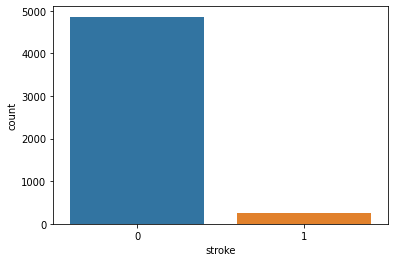

In [59]:
sns.countplot(data=df, x='stroke')
stroke_y = (len(df[df['stroke']==1])/len(df))
print(df.stroke.value_counts()[1], "or", round(stroke_y*100, 2), "% of the people in this dataset had a stroke.")
print(df.stroke.value_counts()[0], "or", round((1-stroke_y)*100, 2), "% of the people in this dataset never had a stroke.")

498 or 9.75 % of the people in this dataset have hypertension.
4612 or 90.25 % of the people in this dataset does not have hypertension.


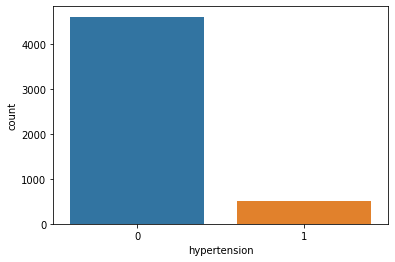

In [60]:
sns.countplot(data=df, x='hypertension')
hypertension_y = (len(df[df['hypertension']==1])/len(df))
print(df.hypertension.value_counts()[1], "or", round(hypertension_y*100, 2), "% of the people in this dataset have hypertension.")
print(df.hypertension.value_counts()[0], "or", round((1-hypertension_y)*100, 2), "% of the people in this dataset does not have hypertension.")

276 or 5.4 % of the people in this dataset have heart disease.
4834 or 94.6 % of the people in this dataset does not have heart disease.


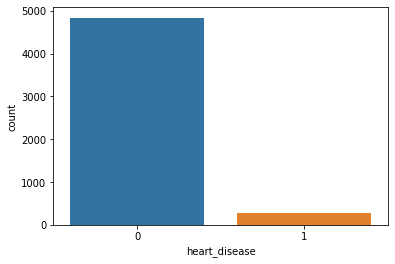

In [61]:
sns.countplot(data=df, x='heart_disease')
heart_disease_y = (len(df[df['heart_disease']==1])/len(df))
print(df.heart_disease.value_counts()[1], "or", round(heart_disease_y*100, 2), "% of the people in this dataset have heart disease.")
print(df.heart_disease.value_counts()[0], "or", round((1-heart_disease_y)*100, 2), "% of the people in this dataset does not have heart disease.")

<AxesSubplot:xlabel='age', ylabel='Count'>

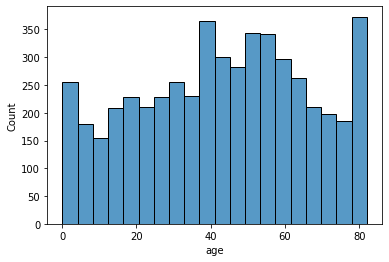

In [62]:
sns.histplot(data=df, x='age')

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

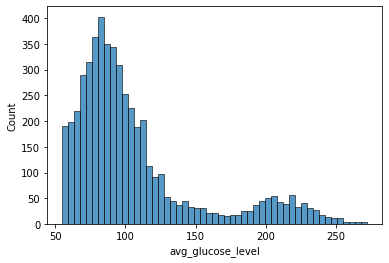

In [63]:
sns.histplot(data=df, x='avg_glucose_level')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

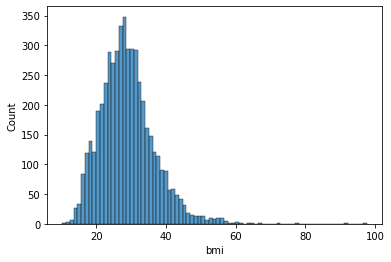

In [64]:
sns.histplot(data=df, x='bmi')

The probability of a male having a stroke is: 5.11 %
The probability of a female having a stroke is: 4.71 %


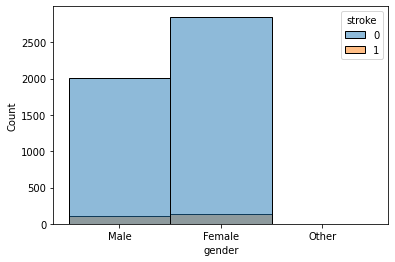

In [65]:
sns.histplot(data=df, x='gender', hue='stroke')
male_scount = len(df[(df.gender=='Male')&(df.stroke==1)])
male_count = len(df[(df.gender=='Male')])
percent_male = (male_scount/male_count)*100
female_scount = len(df[(df.gender=='Female')&(df.stroke==1)])
female_count = len(df[(df.gender=='Female')])
percent_female = (female_scount/female_count)*100
print("The probability of a male having a stroke is:", round(percent_male,2), "%")
print("The probability of a female having a stroke is:", round(percent_female,2), "%")

The probability of a married person having a stroke is: 6.56 %
The probability of a unmarried person having a stroke is: 1.65 %


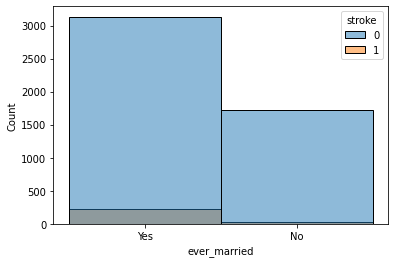

In [66]:
sns.histplot(data=df, x='ever_married', hue='stroke')
married_scount = len(df[(df.ever_married=='Yes')&(df.stroke==1)])
married_count = len(df[(df.ever_married=='Yes')])
percent_married = (married_scount/married_count)*100
unmarried_scount = len(df[(df.ever_married=='No')&(df.stroke==1)])
unmarried_count = len(df[(df.ever_married=='No')])
percent_unmarried = (unmarried_scount/unmarried_count)*100
print("The probability of a married person having a stroke is:", round(percent_married,2), "%")
print("The probability of a unmarried person having a stroke is:", round(percent_unmarried,2), "%")

The probability of a private company worker having a stroke is: 5.09 %
The probability of a self employed person having a stroke is: 7.94 %
The probability of a government worker having a stroke is: 5.02 %
The probability of a stay at home parent having a stroke is: 0.29 %
The probability of a person that never worked having a stroke is: 0.0 %


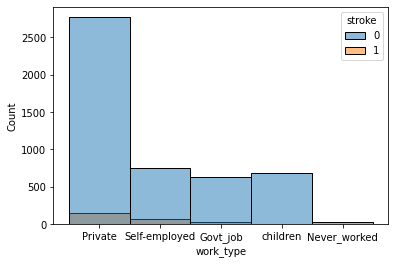

In [67]:
sns.histplot(data=df, x='work_type', hue='stroke')
private_scount = len(df[(df.work_type=='Private')&(df.stroke==1)])
private_count = len(df[(df.work_type=='Private')])
percent_private = (private_scount/private_count)*100
se_scount = len(df[(df.work_type=='Self-employed')&(df.stroke==1)])
se_count = len(df[(df.work_type=='Self-employed')])
percent_se = (se_scount/se_count)*100
gt_scount = len(df[(df.work_type=='Govt_job')&(df.stroke==1)])
gt_count = len(df[(df.work_type=='Govt_job')])
percent_gt = (gt_scount/gt_count)*100
ch_scount = len(df[(df.work_type=='children')&(df.stroke==1)])
ch_count = len(df[(df.work_type=='children')])
percent_ch = (ch_scount/ch_count)*100
nw_scount = len(df[(df.work_type=='Never_worked')&(df.stroke==1)])
nw_count = len(df[(df.work_type=='Never_worked')])
percent_nw = (nw_scount/nw_count)*100
print("The probability of a private company worker having a stroke is:", round(percent_private,2), "%")
print("The probability of a self employed person having a stroke is:", round(percent_se,2), "%")
print("The probability of a government worker having a stroke is:", round(percent_gt,2), "%")
print("The probability of a stay at home parent having a stroke is:", round(percent_ch,2), "%")
print("The probability of a person that never worked having a stroke is:", round(percent_nw,2), "%")

The probability of an urban person having a stroke is: 5.2 %
The probability of a rural person having a stroke is: 4.53 %


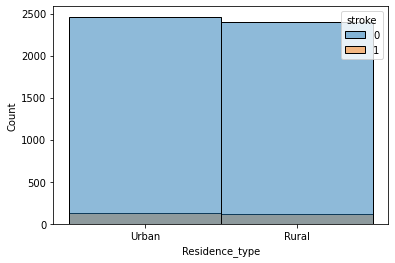

In [68]:
sns.histplot(data=df, x='Residence_type', hue='stroke')
urban_scount = len(df[(df.Residence_type=='Urban')&(df.stroke==1)])
urban_count = len(df[(df.Residence_type=='Urban')])
percent_urban = (urban_scount/urban_count)*100
rural_scount = len(df[(df.Residence_type=='Rural')&(df.stroke==1)])
rural_count = len(df[(df.Residence_type=='Rural')])
percent_rural = (rural_scount/rural_count)*100
print("The probability of an urban person having a stroke is:", round(percent_urban,2), "%")
print("The probability of a rural person having a stroke is:", round(percent_rural,2), "%")

The probability of a former smoker having a stroke is: 7.91 %
The probability of a never smoked person having a stroke is: 4.76 %
The probability of a smoker having a stroke is: 5.32 %
The probability of an unknown smoker having a stroke is: 3.04 %


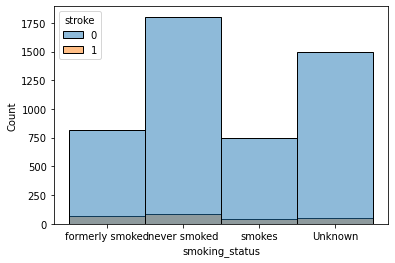

In [69]:
sns.histplot(data=df, x='smoking_status', hue='stroke')
fs_scount = len(df[(df.smoking_status=='formerly smoked')&(df.stroke==1)])
fs_count = len(df[(df.smoking_status=='formerly smoked')])
percent_fs = (fs_scount/fs_count)*100
ns_scount = len(df[(df.smoking_status=='never smoked')&(df.stroke==1)])
ns_count = len(df[(df.smoking_status=='never smoked')])
percent_ns = (ns_scount/ns_count)*100
sm_scount = len(df[(df.smoking_status=='smokes')&(df.stroke==1)])
sm_count = len(df[(df.smoking_status=='smokes')])
percent_sm = (sm_scount/sm_count)*100
un_scount = len(df[(df.smoking_status=='Unknown')&(df.stroke==1)])
un_count = len(df[(df.smoking_status=='Unknown')])
percent_un = (un_scount/un_count)*100
print("The probability of a former smoker having a stroke is:", round(percent_fs,2), "%")
print("The probability of a never smoked person having a stroke is:", round(percent_ns,2), "%")
print("The probability of a smoker having a stroke is:", round(percent_sm,2), "%")
print("The probability of an unknown smoker having a stroke is:", round(percent_un,2), "%")

The average age of stroke victim is: 68
The average age of a person never had a stroke is: 42


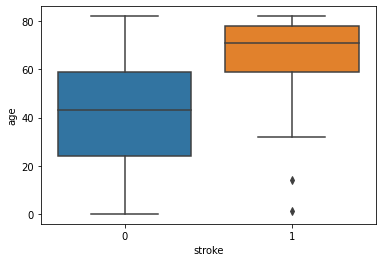

In [70]:
sns.boxplot(x='stroke', y='age', data=df)
print("The average age of stroke victim is:", round(df[(df.stroke==1)].age.mean()))
print("The average age of a person never had a stroke is:", round(df[(df.stroke==0)].age.mean()))

The average bmi of stroke victim is: 30.4
The average bmi of a person never had a stroke is: 28.86


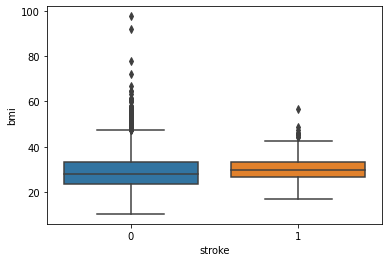

In [71]:
sns.boxplot(x='stroke', y='bmi', data=df)
print("The average bmi of stroke victim is:", round(df[(df.stroke==1)].bmi.mean(),2))
print("The average bmi of a person never had a stroke is:", round(df[(df.stroke==0)].bmi.mean(),2))

The average glucose level of stroke victim is: 132.54
The average glucose level of a person never had a stroke is: 104.8


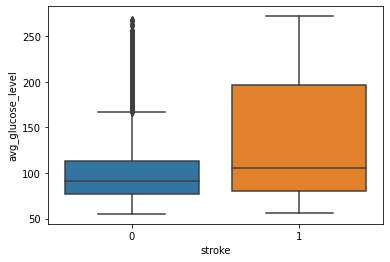

In [72]:
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
print("The average glucose level of stroke victim is:", round(df[(df.stroke==1)].avg_glucose_level.mean(),2))
print("The average glucose level of a person never had a stroke is:", round(df[(df.stroke==0)].avg_glucose_level.mean(),2))

In order to have a better correlation matrix visualization and modeling purposes, I transformed all categorical and binary values to numerical values.

In [73]:
# using label encoder from sklearn to transform gender, ever_married, work_type, Residence_type and smoking_status
le = LabelEncoder()
gen = le.fit_transform(df['gender'])
em = le.fit_transform(df['ever_married'])
wt = le.fit_transform(df['work_type'])
rt = le.fit_transform(df['Residence_type'])
ss = le.fit_transform(df['smoking_status'])

df['gender'] = gen
df['ever_married'] = em
df['work_type'] = wt
df['Residence_type'] = rt
df['smoking_status'] = ss
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60,1,1
1,0,61.0,0,0,1,3,0,202.21,31.04,2,1
2,1,80.0,0,1,1,2,0,105.92,32.50,2,1
3,0,49.0,0,0,1,2,1,171.23,34.40,3,1
4,0,79.0,1,0,1,3,0,174.12,24.00,2,1


<AxesSubplot:>

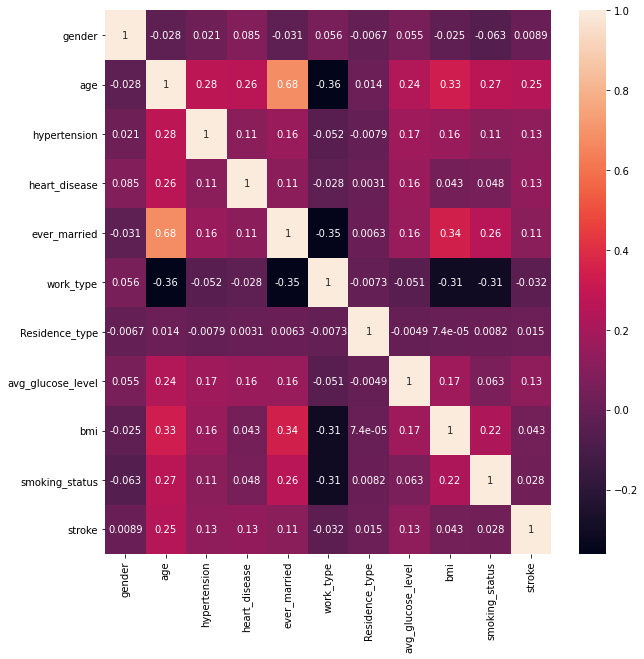

In [74]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)

From the correlation matrix, we can see that age, hypertension, heart disease and average glucose level are most correlated to having a stroke or not.

## Modeling:
For the modeling step, I set stroke as the response and all other features as predictors. Then compared the results using different classifiers to see which one returned the best results. I will also utilize 10-fold cross validation.

In [75]:
# X is the response and y is the features.
X = df.drop(['stroke'],axis=1)
y = df['stroke']

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [77]:
# using standardscaler function from sklearn to standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [100]:
models = []
results = []
accuracy_scores = []
predictions = []
f1_scores = []

models.append(['Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr')])
models.append(['KNearest Neighbor', KNeighborsClassifier()])
models.append(['Decision Tree Classifier', DecisionTreeClassifier()])
models.append(['Naive Bayes', GaussianNB()])
models.append(['SVM', SVC(gamma='auto')])
models.append(['Random Forest Classifier', RandomForestClassifier()])
models.append(['XG Boost', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')])
models.append(['Ada Boost', AdaBoostClassifier()])
# looping each model to generate results
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append([cv_results.mean(), cv_results.std()])
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    predictions.append(y_pred)
    accuracy_scores.append(accuracy_score(Y_test, y_pred))
    f1_scores.append(f1_score(Y_test,y_pred))
    print(name, ':')
    print('Cross Validation Mean Score:', round(cv_results.mean(),3),',', 'Standard Deviation:', cv_results.std())
    print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y_test, y_pred),2))
    print('Mean Squared Error:', round(metrics.mean_squared_error(Y_test, y_pred),2))
    print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)),2))
    print('Accuracy Score:', round(accuracy_score(Y_test, y_pred),3))
    print('F1 Score:', round(f1_score(Y_test, y_pred),2))
    print('\n')


Logistic Regression :
Cross Validation Mean Score: 0.954 , Standard Deviation: 0.0007057484062171798
Mean Absolute Error: 0.06
Mean Squared Error: 0.06
Root Mean Squared Error: 0.24
Accuracy Score: 0.941
F1 Score: 0.0


KNearest Neighbor :
Cross Validation Mean Score: 0.953 , Standard Deviation: 0.002128127086183517
Mean Absolute Error: 0.06
Mean Squared Error: 0.06
Root Mean Squared Error: 0.25
Accuracy Score: 0.936
F1 Score: 0.0


Decision Tree Classifier :
Cross Validation Mean Score: 0.914 , Standard Deviation: 0.013225664440791011
Mean Absolute Error: 0.1
Mean Squared Error: 0.1
Root Mean Squared Error: 0.32
Accuracy Score: 0.899
F1 Score: 0.13


Naive Bayes :
Cross Validation Mean Score: 0.87 , Standard Deviation: 0.019068624070125727
Mean Absolute Error: 0.14
Mean Squared Error: 0.14
Root Mean Squared Error: 0.37
Accuracy Score: 0.865
F1 Score: 0.27


SVM :
Cross Validation Mean Score: 0.954 , Standard Deviation: 0.0007057484062171798
Mean Absolute Error: 0.06
Mean Squared Error

## ROC Curve
Logistic Regression performed the best with AUC of 0.85

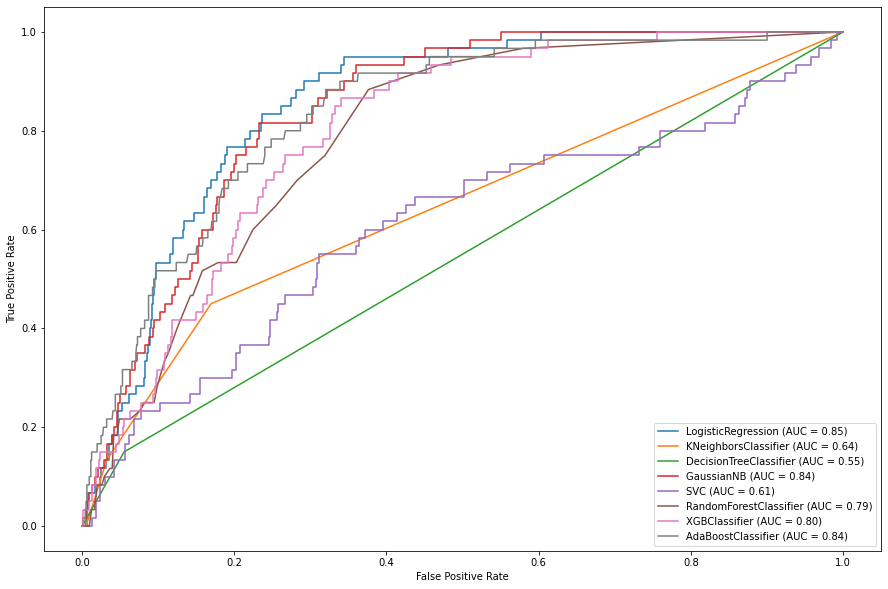

In [79]:
plt.figure(figsize=(15, 10))
ax = plt.gca()
plot_roc_curve(models[0][1], X_test, Y_test, ax=ax)
plot_roc_curve(models[1][1], X_test, Y_test, ax=ax)
plot_roc_curve(models[2][1], X_test, Y_test, ax=ax)
plot_roc_curve(models[3][1], X_test, Y_test, ax=ax)
plot_roc_curve(models[4][1], X_test, Y_test, ax=ax)
plot_roc_curve(models[5][1], X_test, Y_test, ax=ax)
plot_roc_curve(models[6][1], X_test, Y_test, ax=ax)
plot_roc_curve(models[7][1], X_test, Y_test, ax=ax)
plt.show()

## Accuracy Score
I plotted the accuracy scores of all the classifiers, Logistic Regression and SVM performed the best with score of 0.941, followed by Ada Boost with 0.940

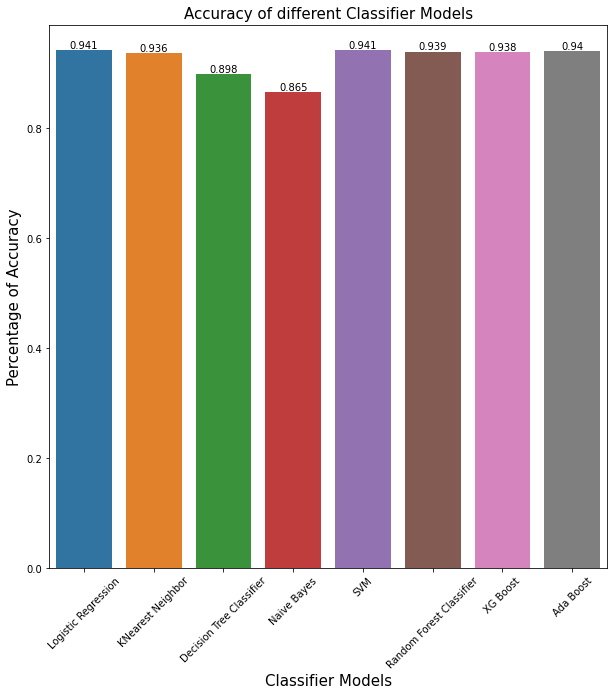

In [80]:
model_names = ['Logistic Regression','KNearest Neighbor','Decision Tree Classifier',
    'Naive Bayes','SVM','Random Forest Classifier','XG Boost','Ada Boost']
accuracy_scores = [round(score, 3) for score in accuracy_scores]

plt.figure(figsize=(10, 10))
ax = sns.barplot(x=model_names, y=accuracy_scores)
ax.bar_label(ax.containers[0])
plt.xlabel('Classifier Models', fontsize = 15)
plt.ylabel('Percentage of Accuracy', fontsize = 15)
plt.title('Accuracy of different Classifier Models', fontsize = 15)
plt.xticks(fontsize = 10, horizontalalignment = 'center', rotation = 45)
plt.yticks(fontsize = 10)
plt.show()

## Confusion Matrix
The following shows confusion matrix for all classifiers.

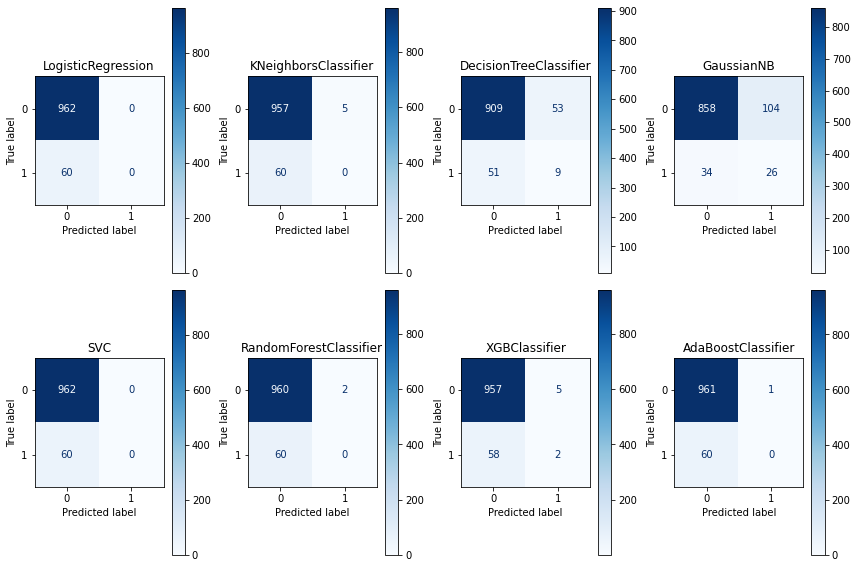

In [81]:
classifiers = []
for m in models:
    classifiers.append(m[1]) 
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12,8))
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_test, Y_test, ax=ax, cmap='Blues')
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

## Results/Analysis:
Logistic Regression performed the best with AUC of 0.85, and accuracy score of 0.941. Even though it could not correctly predict true positive results, I still believe LR is the best model for this specific dataset.

The F1 score returned zero for multiple models due to the fact of having zero true postives. This tends to happen when there is an unbalanced data.

## Discussion and Conclusion:
In the end, it appears that all the classifier performed well in predicting the True Negative labels.  

However, they are not very effective at predicting the True Positive Labels. This was contributed from an unbalanced set. There were way more numbers of non-stroke compared to stroke. There simply was way too low of a number of stroke patient data. Because of that, these models had a hard time correctly predicting if a patient had a stroke. 

One improvement for this ineffectiveness is to use SMOTE (Synthetic Minority Oversampling Technique). This technique can give the minority data class more weight to contribute better results. An another method is to also collect more data of stroke patients. 

In conclusion, I would select Logistic Regression as the model for this dataset, because it has the best accuracy, AUC and overall metrics.